In [98]:
# HCS Workshop 2, Web Scraping

In [99]:
# Author: Catherine Huang, Alyssa Huang, Andrew Nickerson
# Description: We scraped data from the Wikipedia article of the list of 100 largest cities. 
# We also visualized this data in a bar chart using the Pandas library.

In [100]:
# import requests package and set up page

from bs4 import BeautifulSoup
import requests
page = requests.get("https://en.wikipedia.org/wiki/List_of_largest_cities")
# print(page.status_code)
# print(page.content)

soup = BeautifulSoup(page.content, 'html.parser')

In [101]:
# Playing around with the webpage to figure out how to retrieve cities, countries, and populations
content = soup.find(id='content')
bodyContent = content.find(id='bodyContent')
contentText= bodyContent.find(id='mw-content-text')
moreContent = contentText.find(class_='mw-parser-output')


tableContent = soup.find(class_='sortable wikitable mw-datatable')
# print(type(tableContent))
children = tableContent.children

# print(children)

dict = {}

next = False

infos = list(tableContent.find_all('td'))
for i in range(len(infos)):
     thing = infos[i].find('a')
     if not (thing == None):
        city = thing.get('title')
        if not(city == None) and not('List of' in city) and not('Prefectures' in city):
            print("", end = "")
            #print(city, end = " ") 
        if not(city == None) and 'List of cities in' in city:
            country = city[17:]
            #print(country, end = " ")
            next = True
     thing2 = list(infos[i].find_all('span'))
     if not (len(thing2) == 2) and not (len(thing2)==0):
         thing2 = thing2[0]
         if not(thing2 == None) and next:
            population = thing2.contents
            #print(population)
            next = False


In [102]:
# Using BeautifulSoup to parse the contents of the website
content = soup.find(id='content')
bodyContent = content.find(id='bodyContent')
contentText= bodyContent.find(id='mw-content-text')
moreContent = contentText.find(class_='mw-parser-output')
tableContent = soup.find(class_='sortable wikitable mw-datatable')
children = tableContent.children

# Creates lists storing each city, country, and population
# The elements of each list with the same index correspond to one another
cities = []
countries = []
populations = []

# Prints tuples for each city: (city, country, population)
table_rows = tableContent.find_all('tr')
for row in table_rows[2:]:
    td = row.find('td')
    city = row.find('td').find('a').get('title')
    all_td = row.find_all('td')
    for td in all_td:
        link = td.find('a')
        if link == None:
            continue
        if link.get('title') == None:
            continue
        if 'List of cities in ' in link.get('title'):
            country = link.get('title').replace('List of cities in ', '')
            if country == 'the United States':
                country = 'United States'
            break
            
    spans = row.find_all('span')
    for span in spans:
        if span.get('data-sort-value') == None:
            continue
        population = int(span.decode_contents().replace(',', ''))
        break
    populations.append(population)
    
    cities.append(city)
    countries.append(country)
    # print ((city, country, population))

In [103]:
# Creates a pandas dataframe mapping cities to corresponding countries and populations

import pandas as pd

data = {'Cities': cities, 'Countries': countries, 'Populations': populations}
df = pd.DataFrame(data, index=cities)
df.set_index("Cities",drop=True,inplace=True)
print(df)

                      Countries  Populations
Cities                                      
Tokyo                     Japan     37400068
Delhi                     India     28514000
Shanghai                  China     25582000
São Paulo                Brazil     21650000
Mexico City              Mexico     21581000
...                         ...          ...
Washington, D.C.  United States      5207000
Yangon                  Myanmar      5157000
Alexandria                Egypt      5086000
Jinan                     China      5052000
Guadalajara              Mexico      5023000

[81 rows x 2 columns]


Text(0, 0.5, 'Population (millions)')

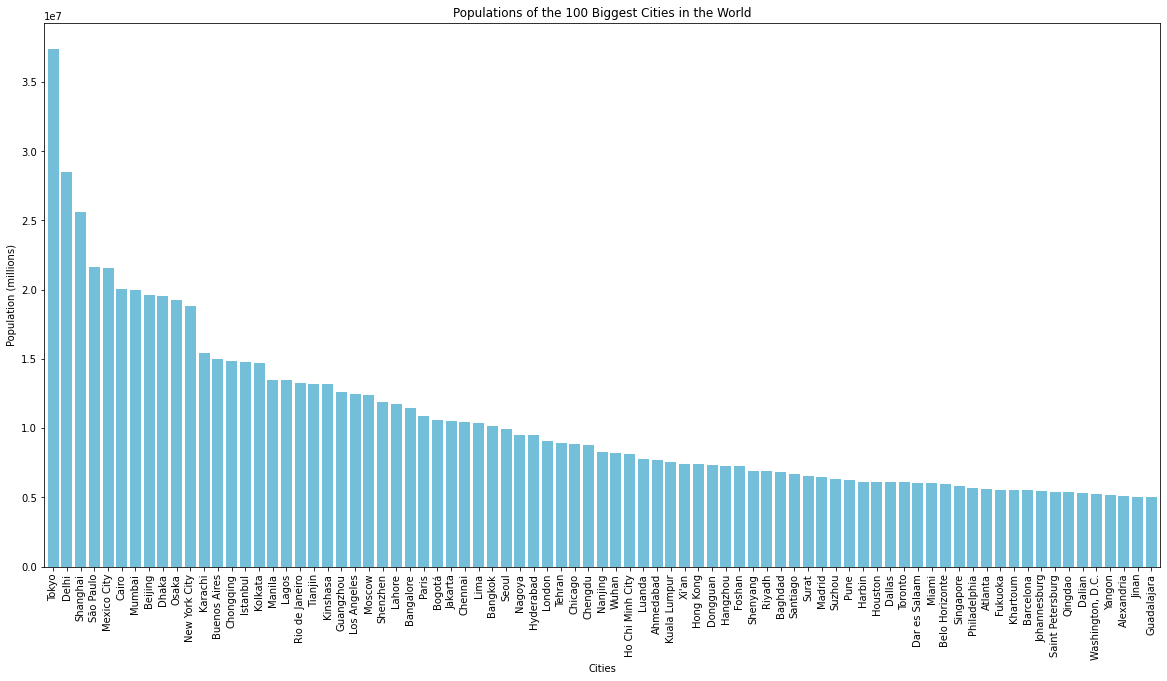

In [104]:
# Plots the dataframe created in previous cell
import matplotlib as plt

plot = df.plot.bar(figsize=(20,10), width=0.8, color=['#73BED9'], title='Populations of the 100 Biggest Cities in the World', legend=False)
plot.set_ylabel("Population (millions)")